Loading packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import matplotlib
import tikzplotlib

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

c:\Users\Justo Puerto\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Opening non overlapping results without initialization

In [2]:
asynchronous_data_without = pd.read_csv('asynchronous_results_without.csv')
asynchronous_data_without[['Size', 'Instance', 'time_endurance', 'drones_numberber']] = asynchronous_data_without[['Size', 'Instance', 'time_endurance'drones_numbernumber']].apply(np.int64)
asynchronous_data_without = asynchronous_data_without.rename(columns={'GAP':'Gap wi'})

Computing means for non overlapping results without initialization

In [3]:
means_table_without = asynchronous_data_without.groupby(['Size', 'time_endurance', 'drones_numberber', 'Alpha_e']).mean()[['Gap wi']].round(2).reset_index()
counts_table_without = asynchronous_data_without.groupby(['Size', 'time_endurance', 'drones_numberber', 'Alpha_e']).count()[['Gap wi']].round(2).reset_index()

Opening non overlapping results with initialization

In [4]:
asynchronous_data_with = pd.read_csv('asynchronous_results_with.csv')
asynchronous_data_with[['Size', 'Instance', 'time_endurance', 'drones_numberber']] = asynchronous_data_with[['Size', 'Instance', 'time_endurance'drones_numbernumber']].apply(np.int64)
asynchronous_data_without = asynchronous_data_without.rename(columns={'GAP':'Gap i'})
asynchronous_data_with['Difference'] = (asynchronous_data_with['HeurVal'] - asynchronous_data_with['ObjVal'])/(asynchronous_data_with['HeurVal']) * 100
asynchronous_data_with = asynchronous_data_with.rename(columns={'GAP':'Gap i', 'HeurTime': 'TimeH'})

Computing means for non overlapping results with initialization

In [5]:
means_table_with = asynchronous_data_with.groupby(['Size', 'time_endurance', 'drones_numberber', 'Alpha_e']).mean()[['Gap i', 'TimeH']].round(2).reset_index()

Representing the boxplot and saving the .tex file

AttributeError: 'Legend' object has no attribute '_ncol'

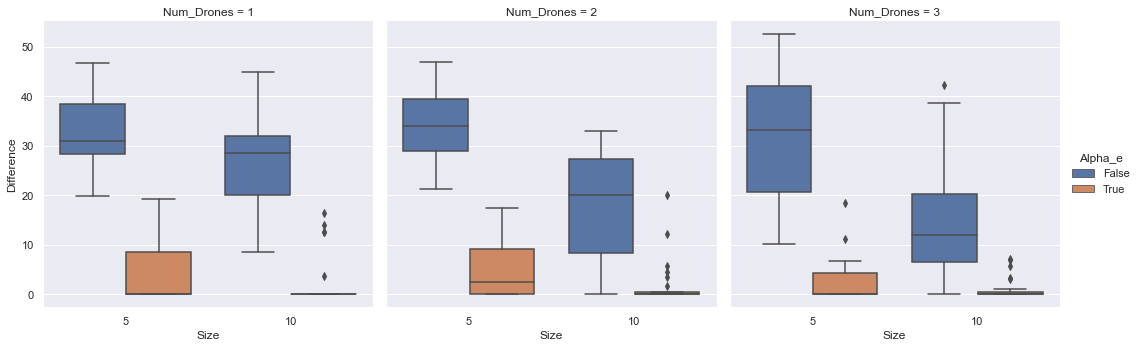

In [6]:
matplotlib.rcParams['axes.unicode_minus'] = False
asynchronous_data_with[['Size', 'Instance', 'time_endurance', 'drones_numberber']] = asynchronous_data_with[['Size', 'Instance', 'time_endurance'drones_numbernumber']].apply(np.int64)
sns.set(style="darkgrid")
g = sns.catplot(x = 'Size', y = 'Difference', kind = 'box', col = 'drones_numberber', hue = 'Alpha_e', data = asynchronous_data_with, aspect = 1, sharey = True, legend = True)
tikzplotlib.save('gap_between_algorithms_asynchronous.tex')
plt.savefig('gap_between_algorithms_asynchronous.png')

Including all the results in a table and save into table_asynchronous.xlsx

In [7]:
data = pd.DataFrame()

data['Size'] = means_table_without['Size']
data['time_endurance'] = means_table_without['time_endurance']
data['drones_numberber'] = means_table_withoudrones_numbernumber']
data['Alpha_e'] = means_table_without['Alpha_e']
data['Gap wi'] = means_table_without['Gap wi']
data['Unsolved'] = 5 - counts_table_without['Gap wi']
data['TimeH'] = means_table_with['TimeH']
data['Gap i'] = means_table_with['Gap i']

data.pivot(index=['time_endurance', 'drones_numberber', 'Alpha_e'], columns = ['Size']).to_excel('table_asynchronous.xlsx')